# Function dependent development in a transport network

## Introduction
### Motivation
Feedback between flow and conduit resistance controls pattern formation in similar ways in biological transport systems that differ dramatically in their physiological functions, anatomical structure, and evolutionary history. Understanding shared principles governing these diverse transport systems could suggest ways to improve biologcially inspired optimization algorithms or design impropved transport networks for artificial tissues, among other things. It could also suggest testable hypotheses for how such remarkably intricate systems have evolved. This project focuses on networks that mimic sheet-like bryozoan colonies (e.g. *Membranipora* sp.) because they differ greatly from systems studied previously, such as plasmodial slimemolds (e.g. physarum) and the vertebrate vasculature. In these colonial animals, the transport system is decentralized and flow passes through a sheet-like space that is connected to the outside of the organism.

Two main questions include: A) Do the consequences of strengthening connections that experience high use depend significantly on the underlying connectivity and physics? And B) what features could give stability to systems that use this kind of feedback? 

### Background
Colonies of the bryozoan *Membranipora* are composed of sheets of individuals (zooids) with tentacle crowns (lophophores). Each individual, living in its coffin shaped box, has its own gut, muscles, and nervous system, but individuals share neural signals (Thorpe, 1975; Shapiro, 1996) and nutrients among each other (Carle and Ruppert, 1983; Miles et al., 1995). Colonies grow by budding new individuals at their edges. This image shows an approximately 3 cm wide colony.
![A bryozoan colony (~3cm)](DSCN0618_adjusted2_downsampled.jpg)

Cilia along the tentacles pump water from above the colony into the space beneath the canopy formed by the tentacle crowns. The individuals feed by catching smaller organisms and other particles drawn in with the water current. The water flows under the canopy of tentacles and between the stalks supporting the tentacle crowns. For the water to keep flowing, it has to exit the colony, so the tentacle crowns in some patches of individuals grow taller than their neighbors and spread aside to form a chimney-like opening. The individuals at the center of the chimney often degenerate. In this image, flow into the tentacle crowns and out of the chimney is visuallized by illuminating particles with a thin sheet of light. The black and white video frames were re-colored in different colors so that long rainbows show fast flow, and short rainbows show slow flow.
![Flow near a chimney (~1 cm wide, ~1/60s per frame)](Colony03NewChimFrontDay4_MaxFrameDifsAsRainbowPlusMedianFrames.jpg)

The tentacle crowns are arranged in a hexagonal tiling, so flow under the canopy of tentacles can be described as going through a hexagonal network of conduits formed by the spaces under pairs of tentacle crowns. The following image shows flow under the canopy and out of the colony, near the growing edge of a colony.
![Flow under the canopy (~1 cm wide, ~1/60s per frame)](Colony10PlanviewDay0_MaxFrameDifsAsRainbowPlusMedianFrames.jpg)

Bryozoans appear to use a form of flow-regulated development to generate the chimney system (Grunbaum, 1997; von Dassow, 2006). The feedback between flow and chimney formation appears similar to the feedback between flow and vessel growth in blood vessels (Kamiya and Togawa, 1980; Langille, 1995), stolons of some hydroid colonies (Dudgeon and Buss, 1996; Buss, 2001), and plasmodial slime molds (Nakagaki et al., 2000), but these systems have very different geometries, pumps, functions, and evolutionary histories. In the slime molds and our circulatory system, conduits (vessels) with high flow grow wider and conduits with low flow shrink. An analogous feedback rule in which heavily used components get strengthened occurs in the nervous and skeletal systems and in wood, with -- of course -- many differences too. In the bryozoans, experiments suggest that enhancing flow out the canopy edge induces new chimney formation, with corresponding increases in canopy height where the flow under the canopy is increased. This and other observations suggest that chimney patterning may be driven by positive feedback between conduit conductance and flow (with the conduits being gaps between tentacle crowns and the spaces under the canopy). Looking at bryozoans might help in identifying princples shared among these diverse systems.

### Questions
Initial to address with this model include:

1) Can feedback between flow and conduit size maintain the observed chimney pattern?

2) Is the pattern resilient to perturbations that mimic natural injuries?

3) How sensitive is the pattern (and pattern stability) to parameter variation? (Over a colony's life, parameters may vary because of epibiont fouling or formation of spines as a defense against predators.)

4) Can flow-regulation of conduit size explain formation of the chimney pattern as the colony grows?

## Form of feedback function:
------------------------------------
For the model, take h as a geometrical parameter with units of length that is regulated by flow (e.g. canopy height and/or canopy gap width in the bryozoan colonies, or blood vessel radius in the circulatory system). Conductance (c) increases monotonically with h, e.g. as canopy as canopy height increases it becomes easier for fluid to flow under the canopy, or as blood vessel radius increases it becomes easier to pump blood through the vessel. If conduits with flow rates that are too great for their current size enlarge, and conduits with flow that is too low for their current size shrink, it implies that the rate of change in h should vary with a parameter S that depends on both volumetric flow rate (q) and conduit size (h). S should increase monotonically with volumetric flow rate at constant size, and decrease monotonically with size at constant flow rate. A simple form would be as follows:

$\ \frac{dh}{dt} = f(h, S(h, q)-S_0) $

Here, $\ S_0 $ is a set point in S. The function $ f(h, \Delta S) $ accounts for differences in possible growth models for the conduits. For example, if conduits grow at the same rate per unit length at different sizes, $ f = a·h·\Delta S $; however, if they have a growth zone, one might expect $ f = a·\Delta S $. Or, if there is a minimum size, f would take a form such as: $ f = a·H(h-h_{min})·\Delta S $, with H(x) being a step function. This function would make most sense for gaps in the canopy: the rate of change in gap diameter would be equal to the speed of movement of the tentacle tips toward or away from the gap; however, the speed of movement of each tentacle tip should depend only on the value of $\Delta S$ at that tentacle tip (unless there is competition for space among the tentacle crowns; but that should make larger gaps grow disproportionately slowly).

In vertebrates, blood vessel radius is affected by shear stress, and shear stress is a local cue that an epithelium could detect (as opposed to volumetric flow rate which requires information on flow at a distance from the tissue surface); therefore, it makes sense to use shear stress as a starting point for developing the model. 

For a wide variety of conduits, conductance (c) and shear stress ($\ \tau $) vary as power functions of conduit width. For example, we can consider several simple cases:
$$
\begin{array}{c|lcr}
\text{Cases} & h & c & \tau \\
\hline
\text{cylindrical vessel} & \text{radius} & \pi h^4/(8 \mu \Delta L) & 4 \mu q / (\pi h^3) \\
\text{porous block} & \text{block height} & \kappa h d /(\mu L) & K \mu q/(\kappa d h) \\
\text{parallel plates} & \text{distance between plates} & 2 d h^3 / (3 \mu L) & 3 \mu q / (2 d h^2) \\
\text{parallel plates} & \text{height of plates} & 2 h d^3 / (3 \mu L) & 3 \mu q / (2 h d^2) \\
\text{circular pore} & \text{pore radius} & h^3 / (3 \mu) & K \mu q / h^3 \text{ ??}
\end{array}
$$
(All of these assume low Reynolds number flow (i.e. laminar). L is conduit length along the direction of flow, $\mu$ is dynamic viscosity, d is conduit dimension perpendicular to the flow and perpendicular to h, K and $\kappa$ are proportionality constants. Cylindrical vessel: assuming Hagen-Poiseuille flow. Porous block: assuming Darcy's law, with k and K constants (k is permeability), total area of pores exposed to shear would be proportional to block volume (d·h·L) so the force balance would be $ k_1 \tau d h L = k_2 \Delta p d h $, and substituting into $ q = c \Delta p $ gives the expression for $\tau$ as a function of q shown. Parallel plates: plane Poiseuille flow with distance between plates much less than the width of the plates. Circular pore: Sampson flow for a circular pore in an infinitely thin sheet; here shear scaling is based on the dimensions of the terms.)

Therefore, it is reasonable to take $ c = \beta h^w $ with $ 1 \le w \le 4 $, and (assuming S follows the form of shear stress, $\tau$) $ S = \gamma q h^{y-w} $ with $ 0 \le y \le 1 $ and $ y \le w-1 $. Hence:

$ \frac{dh}{dt} = f(h, (\gamma q h^{y-w} - S_0) ) $

In terms of c and p: $ \frac{dc}{dt} = \frac{dc}{dh} \frac{dh}{dt} $, so $ \frac{dc}{dt} = \beta w h^{w-1} f(h, \gamma q h^{y-w} - S_0) $. Substituting, $ h = (c/\beta)^{1/w} $ and $ q = c \Delta p $, and simplifying gives: 
$$ \frac{dc}{dt} = f((c/\beta)^{1/w}, \beta^{\frac{1}{w} (w - y + 1)} c^{\frac{1}{w} (w - 1)} w (c^{\frac{y}{w}} \gamma \Delta p - \beta^{\frac{1}{w} (y - w)} s_{0}) ) $$. 

One can combine terms to be more convenient, with $ z=y/w $ (based on the cases above: $ 0 \le z \le 1/3 $):
$$ \frac{dc}{dt} = f(h, r c^{\frac{w-1}{w}} (b· c^z ·\Delta p - 1) )$$.

For cases where $ f(h, \Delta S) $ is the product of a step function in h and $ \Delta S $, we can set:
$$ \frac{dc}{dt} = H(c-c_0) r · c^{\frac{w-1}{w}} (b · c^z · \Delta p - 1) $$

However, because this would trap c at c0, it makes more sense to use:

$$ \frac{dc}{dt} = 
\begin{cases} 
r · c^{\frac{w-1}{w}} (b· c^z ·\Delta p - 1), & b· c^z \Delta p > 1 \cup c>c_{min} \\
0, & b·c^z ·\Delta p < 1 \cap c < c_{min} 
\end{cases}
$$

This is the form used in the cells below.

# Solving for pressure: general network

Inflow vector is a column matrix of flows ($\ q_k $) into each interior node (counting from node 0 to node z-1, as in Python; exterior node is node z). The inflow vector is: 

$\ \mathbf{q} = \begin{bmatrix} q_0 \\ q_1 \\ \vdots \\ q _{z-1}\\ \end{bmatrix} $

Conservation of volume means that flow into the node from the exterior ($\ q_{in, k} $) is equal to outflow from the node to all other nodes. In addition, the outflow from the node along each edge is pressure differences along each conduit (edge) multiplied by the conductance of the conduit. With $\ N(C)_{i, j} $ the conductance at the edge connecting node i to node j, and $\ p_j $ the pressure (p) at node j (exterior node is node z), this gives:

$$\ q_k = \sum_{j=0}^z -N(C)_{k,j}(p_k-p_j) $$

After rearrangement this gives:

$$\ q_k = (\sum_{j=0}^z N(C)_{k,j}p_j) - (p_k \sum_{j=0}^z N(C)_{k,j}) $$

Defining a new matrix, G as follows: 

$$\ G_{k,j} = \begin{cases} N(C)_{k,j},  & k \neq j \\
-\sum_{i=0}^z N(C)_{k,i}, & j=k \end{cases} $$

This can be represented as:

$$\ q_k = \sum_{j=0}^z G_{k,j}p_j $$

Or as matrices: $\ \mathbf{q = Gp} $

If one defines a new matrix B, the directed incidence matrix, such that:

$$\ B_{i,j} = \begin{cases} -1,  & \text{edge i begins at node j} \\ 1, & \text{if edge i ends at node j} \\ 0, & \text{otherwise} \end{cases} $$ 

For the bryozoan colony model, with edges from inner nodes to the exterior node in the bottom rows, and edges among interior nodes in the top rows, this is: 

$$\ \mathbf B = \begin{bmatrix} -1 & 1 & 0 & \cdots & 0  & 0 & 0\\ 0 & -1 & 1 & \cdots & 0 & 0 & 0\\ \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\ 0 & 0 & 0 &\cdots & 0 & -1 & 1\\ \end{bmatrix} $$

Define a new diagonal conductance matrix C such that $\ C_{i,j} = \delta_{i, j} c_i $, with $\ c_i $ the conductance of edge i ($\ c_i = N(C)_{k,j} \text{ if } B_{i,k} = -B_{i,j} = \pm1 $), and w is the number of edges:

$$\ \mathbf C = \begin{bmatrix} c_0 & 0 & \cdots  & 0 \\ 0 & c_1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & c_{w-1}\\ \end{bmatrix} $$

Then (see '1' below): 
$$\ G_{k,l} = -\sum_{i=0}^{w} \sum_{j=0}^{z} B_{i,k}C_{i,j}B_{j, l} $$
$$\ \mathbf{G = -B'CB} $$

Hence, $\ \mathbf{q = -B'CBp} $

This gives more unknowns (pressures at nodes) than knowns (flows into nodes, $\ q_i $). To reduce the number of unknowns to the number of knowns, remove $\ p_z $ and the column of B corresponding to the exterior node ($\ B_{i,z} $). This is equivalent to setting exterior pressure to 0. Using these reduced matrices,$\ \mathbf{B_z, p_z} $ gives: $\ \mathbf{q = -B_z'CB_zp_z} $

This can be solved directly: $\ \mathbf{(-B_z'CB_z)^{-1}q = G_Z^{-1}q = p_z} $. However, it seems like there should be a faster way to update the model at each iteraction (in which the diagonal matrix C changes but B does not) than inverting G. 

# Topology of bryozoan colony
For the model, each nodes represents the corners where three lophores (crowns of tentacles) meet, the conduits (edges connecting nodes) are the spaces (formed by the gap under a pair of adjacent tentacle crowns) connecting. Flow into the parts of the three tentacle crowns adjoining node j is $q_j$; the conductance of the space under the pair of crowns separating node j and node k is $N(C)_{j,k}$; flow out the colony to the exterior node (node z) goes through edge $N(C)_{j,z}$; this represents leakage between and within tentacle crowns, including large excurrent openings (chimneys). Note that elements $N(C)_{j,k}$ correspond to elements $c_d$ in the conductance matrix, C, however, the numbering depends on the order that edges and nodes are listed in the incidence matrix, B.

For the bryozoan colony, the incidence matrix $\mathbf{B_z}$ has dimensions of $num(edges)=n(5m-1)/2 $ by $\ num(nodes)=z=m*n $, where n is the number of nodes running in phalanxes left to right in the colony (twice the number of crowns left-right), and m is the number of nodes top-bottom (same as number of crowns). Each row of Bz shows -1 (node at tail of directed edge) or +1 (node at head of directed edge). For edges from interior node to exterior, Bz only contains the -1 for tail node.

To simplify the geometry, the colony is treated as wrapping around a cylinder in a helix. Conduits connect node k to node k+1 for each node along each phalanx of tentacle crowns, or (for the node at the end of the phalanx, for which mod(k,n)=n-1) node k connects to node k-n. Finally, every other node connects to the one in the phalanx in front of it (to produce the hexagonal pattern). Therefore, for $mod(k,n) \neq n-1$, there is a row d with $B_{d,k+1}=1=-B_{d,k}$, for $mod(k,n)=n-1$ there is a row d with $B_{d,k-n}=1=-B_{d,k}$, and for $mod{k+1,2}=0$ there is a row d with $B_{d,k+n-1}=1=-B_{d,k}$

Flow at the top and bottom boundaries are treated identically: just lumping terms into the flow to the exterior node (and values for outflow conduits for nodes at the colony boundary are not treated differently from others, at present). 

<IPython.core.display.Javascript object>


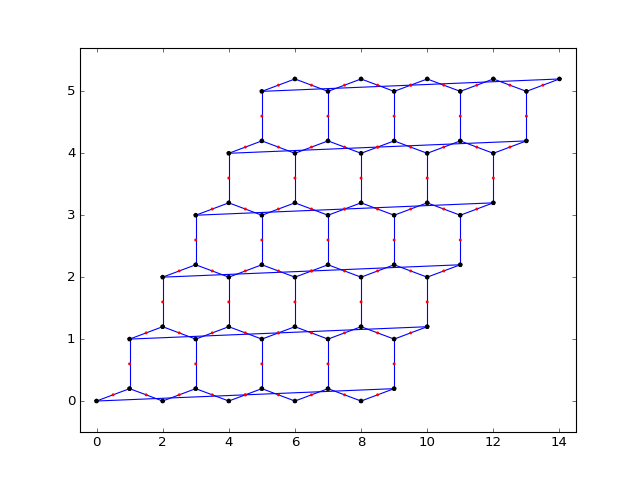

<IPython.core.display.Javascript object>


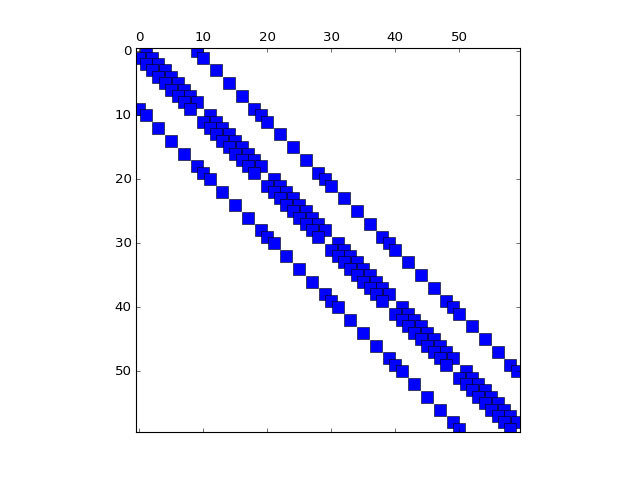

"\nFigure 1: Topology of the colony. Blue lines indicate edges (conduits) connecting interior nodes;\ndark dots indicate edges (conduits) to the exterior node. Note the long blue lines where the left\nand right edges wrap around (this is meant to simulate a cylinrical colony, but for clarity of\nthe topology it's flattened).\n\nFigure 2: Spy plot of the incidence submatrix for the interior edges (not including the\nconduits/edges to the exterior node).\n"

In [1]:
"""
'Bryozoan.py' is contains a class definition for generating a colony with the geometry defined above.
"""

import Bryozoan as bryo
%matplotlib notebook
CrownsInPhalanx = 5
NumPhalanxes = 6
c1=bryo.Colony(nz=CrownsInPhalanx, mz=NumPhalanxes)
c1.colonyplot()

"""
Figure 1: Topology of the colony. Blue lines indicate edges (conduits) connecting interior nodes;
dark dots indicate edges (conduits) to the exterior node. Note the long blue lines where the left
and right edges wrap around (this is meant to simulate a cylinrical colony, but for clarity of
the topology it's flattened).

Figure 2: Spy plot of the incidence submatrix for the interior edges (not including the
conduits/edges to the exterior node).
"""

### Model output: example parameters

The following cells give examples of a parameter set in which a slightly larger gap in a uniform canopy grows into a chimney-like opening: a large gap, with large conductance conduits for flow between nodes (i.e. for flow under the canopy), and this 'chimney' is stable to perturbation mimicking a nearby injury.

However, note that normal chimneys form at the growing edge of the canopy, which is not represented here.

<IPython.core.display.Javascript object>


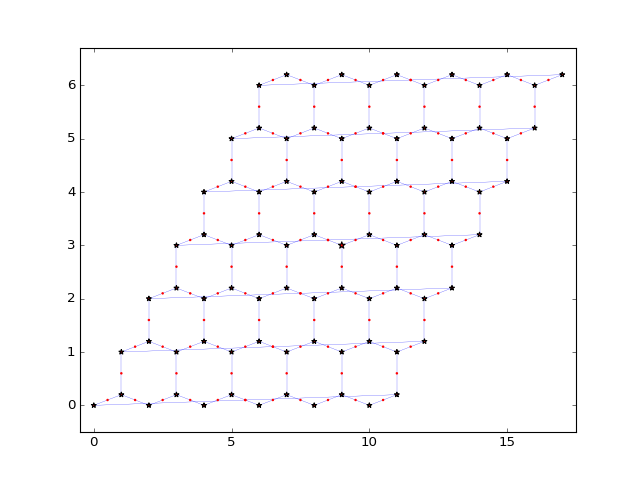

In [14]:
# Example of a stable 'chimney' with vaguely plausible parameters.
# Create colony object. 
# Note that 'yminusx' in the code is equivalent to y in the cell above, so 'yminusx'/w is z.
c1 = bryo.Colony(nz=6, mz=7, OutflowConductivity=0.01, dCdt=bryo.dCdt_default,
                 dCdt_in_params={'yminusx': 1, 'b': 3, 'r': 0.2, 'w': 3, 'c0': 0.5},
                    dCdt_out_params={'yminusx': 1, 'b': 0.3, 'r': 1, 'w': 3, 'c0': 0.0009})
# Set a central outflow conduit (edge) to have higher conductance
c1.setouterconductivities([42], [0.02])
# Create plot
c1.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


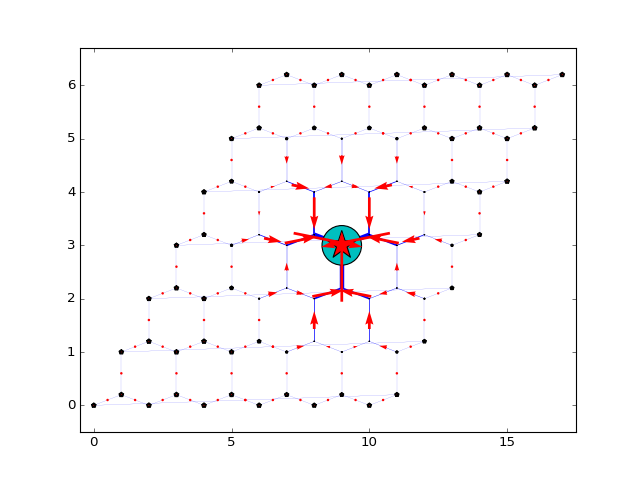

In [15]:
# Solve dif. eqs. for c1, put result in c2, and plot
c2 = c1.develop(10)
c2.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


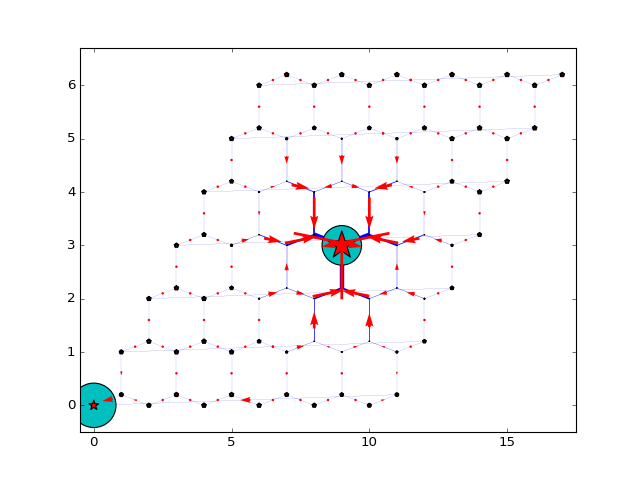

In [16]:
# Perturb colony c2 by opening up outflow in lower left, then plot.
c2.setouterconductivities([0], [20])
c2.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


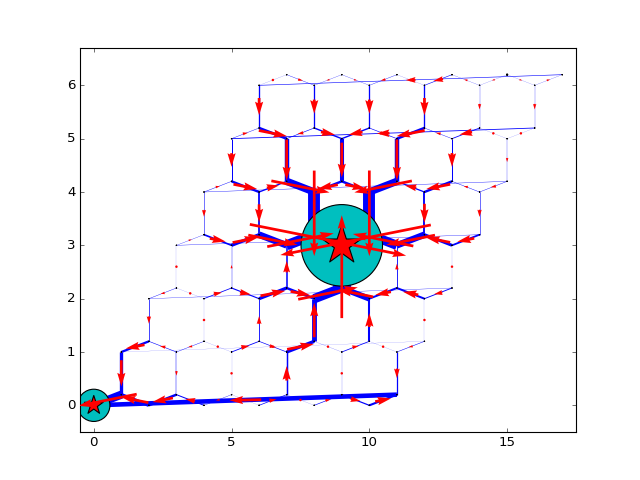

In [17]:
# Solve dif. eqs. for c2 after perturbation, put in c3 & plot.
c3 = c2.develop(10)
c3.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

### Model output: example parameters 2

The following cells give examples of a parameter set with a slightly different choice of z and w: it's _much_ harder to generate a chimney.

However, the form of the equation does make it hard to compare other parameters to see whether they make sense when the exponents y and w change.

<IPython.core.display.Javascript object>


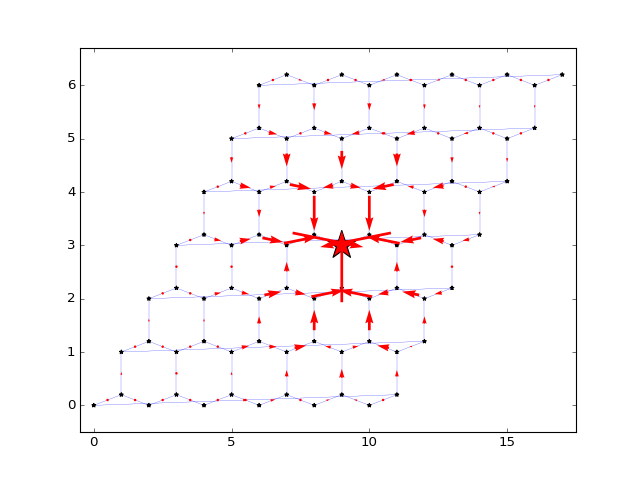

In [32]:
# Create colony object. 
# Note that 'yminusx' in the code is equivalent to y in the cell above, so 'yminusx'/w is z.
cA = bryo.Colony(nz=6, mz=7, OutflowConductivity=0.01, dCdt=bryo.dCdt_default,
                 dCdt_in_params={'yminusx': 0.5, 'b': 10, 'r': 1, 'w': 2, 'c0': 0.5},
                    dCdt_out_params={'yminusx': 0, 'b': 0.3, 'r': 1, 'w': 3, 'c0': 0.0009})
# Set a central outflow conduit (edge) to have higher conductance
cA.setouterconductivities([42], [1])
# Create plot
cA.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


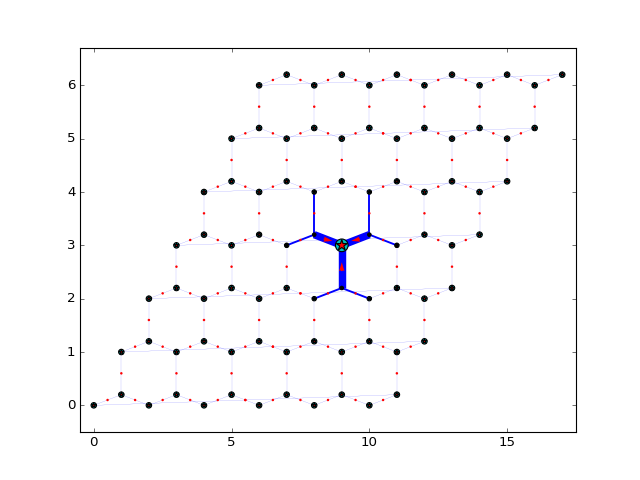

In [33]:
# Solve dif. eqs. for c1, put result in c2, and plot
cB = cA.develop(10)
cB.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

### 1) Explanation for $\ \mathbf {G = -B'CB} $

$\ C_{i,j} = 0 \text{ for } i \neq j \implies \sum_{j=0}^{z} C_{i,j}B_{j, l} = C_{i,i}B_{i, l} $

Therefore: $\ -\sum_{i=0}^{w} \sum_{j=0}^{z} B_{i,k}C_{i,j}B_{j, l} = -\sum_{i=0}^{w}  C_{i,i}B_{i,k}B_{i, l} $

For k=l this gives the (negative) of the sum of conductivities of edges: 

$\ B_{i,k} \in {-1,0,1} \implies B_{i,k}B_{i, k} \in {0, 1} $, so $\ k = l \implies -\sum_{i=0}^{w}  C_{i,i}B_{i,k}B_{i, l} = -\sum_{i \in D} C_{i,i} $, where D is the set of all edges that connect to node k. However, $\ -\sum_{i \in D} C_{i,i} = -\sum_{j=0}^{z} N(C)_{k, j} = G_{k,k} $

Assuming only one edge (edge d) connects each pair of nodes: $\ k \neq l \implies B_{i, k}B_{i,l} = \begin{cases} 0, & i \neq d \\ -1, & i=d \end{cases} $. 

Therefore: $\ k \neq l \implies -\sum_{i=0}^{w}  C_{i,i}B_{i,k}B_{i, l} = C_{d,d} = N(C)_{k,l} = G_{k,l} $

Hence: $\ G_{k,l} = -\sum_{i=0}^{w} \sum_{j=0}^{z} B_{i,k}C_{i,j}B_{j, l} $

Or, equivalently: $\ \mathbf{G = -B'CB} $

### References
<!--bibtex

@article{BantaEtAl1974,
   author = {Banta, W. C. and McKinney, F. K. and Zimmer, R. L.},
   title = {Bryozoan Monticules: Excurrent Water Outlets?},
   journal = {Science},
   volume = {185},
   number = {4153},
   pages = {783-784},
   year = {1974}
}

@inbook{Buss2001,
   author = {Buss, L. W.},
   title = {Growth by intussusception in Hydractiniid hydroids},
   booktitle = {Evolutionary Patterns: Growth, Form, and Tempo in the Fossil Record},
   editor = {Jackson, J.B.C. and Lidgard, S. and McKinney, F. K.},
   publisher = {University of Chicago Press},
   address = {Chicago},
   chapter = {1},
   pages = {3-26},
   year = {2001}
}

@article{CarleAndRuppert1983,
   author = {Carle, Karen J. and Ruppert, E. E.},
   title = {Comparative ultrastructure of the bryozoan funiculus: A blood vessel homologue},
   journal = {Journal of Zoological Systematics and Evolutionary Research},
   volume = {21},
   number = {3},
   pages = {181-193},
   year = {1983}
}

@article{CookAndChimonides1980,
   author = {Cook, P.L. and Chimonides, P.J.},
   title = {Further Observations on Water Current Patterns in Living Bryozoa},
   journal = {Cahiers de Biologie Marine},
   volume = {21},
   number = {4},
   pages = {393-402},
   year = {1980}
}

@article{DudgeonAndBuss1996,
   author = {Dudgeon, S. R. and Buss, L. W.},
   title = {Growing with the flow: On the maintenance and malleability of colony form in the hydroid Hydractinia},
   journal = {American Naturalist},
   volume = {147},
   number = {5},
   pages = {667-691},
   year = {1996}
}

@article{EckmanAndOkamura1998,
   author = {Eckman, J. E. and Okamura, B.},
   title = {A model of particle capture by bryozoans in turbulent flow: significance of colony form},
   journal = {The American Naturalist},
   volume = {152},
   number = {6},
   pages = {861-80},
   year = {1998}
}

@article{FenchelAndGlud1998,
   author = {Fenchel, Tom and Glud, Ronnie N.},
   title = {Veil architecture in a sulphide-oxidizing bacterium enhances countercurrent flux},
   journal = {Nature},
   volume = {394},
   number = {6691},
   pages = {367-369},
   year = {1998}
}

@article{Grunbaum1997,
   author = {Grunbaum, Daniel},
   title = {Hydromechanical Mechanisms of Colony Organization and Cost of Defense in an Encrusting Bryozoan, Membranipora membranacea},
   journal = {Limnology and Oceanography},
   volume = {42},
   number = {4},
   pages = {741-752},
   year = {1997}
}

@book{KaandorpAndKubler2001,
   author = {Kaandorp, Jaap A. and Kübler, Janet E.},
   title = {The algorithmic beauty of seaweeds, sponges, and corals},
   publisher = {Springer-Verlag New York, Inc.},
   pages = {193},
   year = {2001}
}

@article{KamiyaAndTogawa1980,
   author = {Kamiya, A. and Togawa, T.},
   title = {Adaptive Regulation of Wall Shear-Stress to Flow Change in the Canine Carotid-Artery},
   journal = {American Journal of Physiology - Heart and Circulatory Physiology},
   volume = {239},
   number = {1},
   pages = {H14-H21},
   year = {1980}
}

@article{
   author = {Kott, Patricia},
   title = {Form and Function in the Ascidiacea},
   journal = {Bulletin of Marine Science},
   volume = {45},
   number = {2},
   pages = {253-276},
   year = {1989}
}

@article{Labarbera1990,
   author = {Labarbera, M.},
   title = {Principles of Design of Fluid Transport-Systems in Zoology},
   journal = {Science},
   volume = {249},
   number = {4972},
   pages = {992-1000},
   year = {1990}
}

@inbook{Langille1995,
   author = {Langille, B.L.},
   title = {Blood Flow-Induced Remodeling of the Artery Wall},
   booktitle = {Flow-Dependent Regulation of Vascular Function},
   editor = {Bevan, J.A. and Kaley, G. and Rubanyi, G.M.},
   series = {Clinical Physiology Series},
   publisher = {Oxford University Press},
   address = {New York, N.Y.},
   pages = {277-299},
   year = {1995}
}

@article{MilesEtAl1995,
   author = {Miles, J. S. and Harvell, C. D. and Griggs, C. M. and Eisner, S.},
   title = {Resource translocation in a marine bryozoan: quantification and visualization of 14C and 35S},
   journal = {Marine Biology},
   volume = {122},
   number = {3},
   pages = {439-445},
   year = {1995}
}

@article{Miller2014,
   author = {Miller, Jordan S.},
   title = {The Billion Cell Construct: Will Three-Dimensional Printing Get Us There?},
   journal = {Plos Biology},
   volume = {12},
   number = {6},
   pages = {e1001882},
   year = {2014}
}

@article{NakagakiEtAl2000,
   author = {Nakagaki, T. and Yamada, H. and Ueda, T.},
   title = {Interaction between cell shape and contraction pattern in the Physarum plasmodium},
   journal = {Biophysical Chemistry},
   volume = {84},
   number = {3},
   pages = {195-204},
   year = {2000}
}

@article{OkamuraAndPartridge1999,
   author = {Okamura, B. and Partridge, J. C.},
   title = {Suspension feeding adaptations to extreme flow environments in a marine bryozoan},
   journal = {Biological Bulletin},
   volume = {196},
   number = {2},
   pages = {205-215},
   year = {1999}
}

@article{PriesEtAl1998,
   author = {Pries, A. R. and Secomb, T. W. and Gaehtgens, P.},
   title = {Structural adaptation and stability of microvascular networks: theory and simulations},
   journal = {The American journal of physiology},
   volume = {275},
   number = {2 Pt 2},
   pages = {H349-60},
   year = {1998}
}

@article{RouwkemaAndKhademhosseini
   author = {Rouwkema, Jeroen and Khademhosseini, Ali},
   title = {Vascularization and Angiogenesis in Tissue Engineering: Beyond Creating Static Networks},
   journal = {Trends in Biotechnology},
   volume = {34},
   number = {9},
   pages = {733-745},
   year = {2016}
}

@article{Ryland2001,
   author = {Ryland, J. S.},
   title = {Convergent colonial organization and reproductive function in two bryozoan species epizoic on gastropod shells},
   journal = {Journal of Natural History},
   volume = {35},
   number = {7},
   pages = {1085-1101},
   year = {2001}
}

@article{Shapiro1996,
   author = {Shapiro, D.},
   title = {Size-dependent neural integration between genetically different colonies of a marine bryozoan},
   journal = {J Exp Biol},
   volume = {199},
   number = {5},
   pages = {1229-1239},
   year = {1996}
}

@article{ShunatovaAndOstrovsky2002,
   author = {Shunatova, N. and Ostrovsky, A.},
   title = {Group autozooidal behaviour and chimneys in marine bryozoans},
   journal = {Marine Biology},
   volume = {140},
   number = {3},
   pages = {503-518},
   year = {2002}
}

@article{TamayolEtAl2010,
   author = {Tamayol, A. and Khosla, A. and Gray, B. and Bahrami, M.},
   title = {Pressure Drop in Microchannels Filled With Porous Media},
   number = {54501},
   pages = {21-30},
   year = {2010}
}

@article{TeroEtAl2010,
   author = {Tero, A. and Takagi, S. and Saigusa, T. and Ito, K. and Bebber, D. P. and Fricker, M. D. and Yumiki, K. and Kobayashi, R. and Nakagaki, T.},
   title = {Rules for biologically inspired adaptive network design},
   journal = {Science},
   volume = {327},
   number = {5964},
   pages = {439-42},
   year = {2010}
}

@article{Thorpe1975,
   author = {Thorpe, J. P. and Shelton, G. A. and Laverack, M. S.},
   title = {Colonial nervous control of lophophore retraction in cheilostome Bryozoa},
   journal = {Science},
   volume = {189},
   number = {4196},
   pages = {60-61},
   year = {1975}
}

@book{Vogel1994,
   author = {Vogel, Steven},
   title = {Life in moving fluids: the physical biology of flow},
   publisher = {Princeton University Press},
   year = {1994}
}

@article{vonDassow2005a,
   author = {von Dassow, Michelangelo},
   title = {Effects of Ambient Flow and Injury on the Morphology of a Fluid Transport System in a Bryozoan},
   journal = {The Biological Bulletin},
   volume = {208},
   number = {1},
   pages = {47-59},
   year = {2005}
}

@article{vonDassow2005b,
   author = {von Dassow, Michelangelo},
   title = {Flow and conduit formation in the external fluid-transport system of a suspension feeder},
   journal = {Journal of Experimental Biology},
   volume = {208},
   number = {15},
   pages = {2931-2938},
   year = {2005}
}

@article{vonDassow2006,
   author = {von Dassow, Michelangelo},
   title = {Function-Dependent Development in a Colonial Animal},
   journal = {The Biological Bulletin},
   volume = {211},
   number = {1},
   pages = {76-82},
   year = {2006}
}

@article{WatanabeEtAl2011,
   author = {Watanabe, S. and Tero, A. and Takamatsu, A. and Nakagaki, T.},
   title = {Traffic optimization in railroad networks using an algorithm mimicking an amoeba-like organism, Physarum plasmodium},
   journal = {Bio Systems},
   volume = {105},
   number = {3},
   pages = {225-32},
   year = {2011}
}

@inbook{Winston1979,
   author = {Winston, J.E.},
   title = {Current -Related Morphology and Behavior in Some Pacific Coast Bryozoans},
   booktitle = {Advances in Bryozoology},
   editor = {Larwood, G.P. and Abbott, M.B.},
   publisher = {Academic Press, Inc.},
   address = {New York, N.Y.},
   pages = {247-268},
   year = {1979}
}

@article{Zamir1977,
   author = {Zamir, M.},
   title = {Shear Forces and Blood-Vessel Radii in Cardiovascular-System},
   journal = {Journal of General Physiology},
   volume = {69},
   number = {4},
   pages = {449-461},
   year = {1977}
}

-->